In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Final slope (m): 0.695359945901271
Final intercept (b): -4.726653850925891e-16
Final cost: 0.5164745440086658


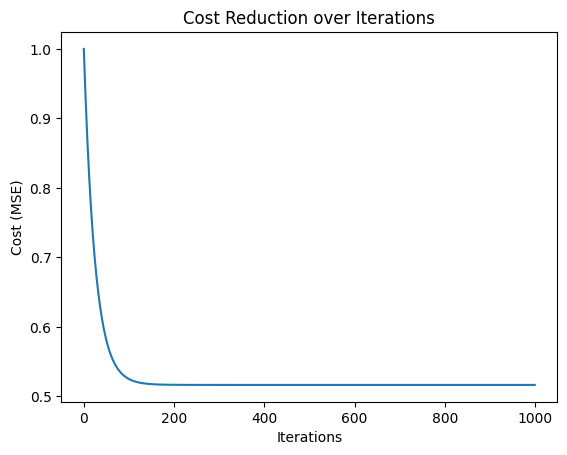

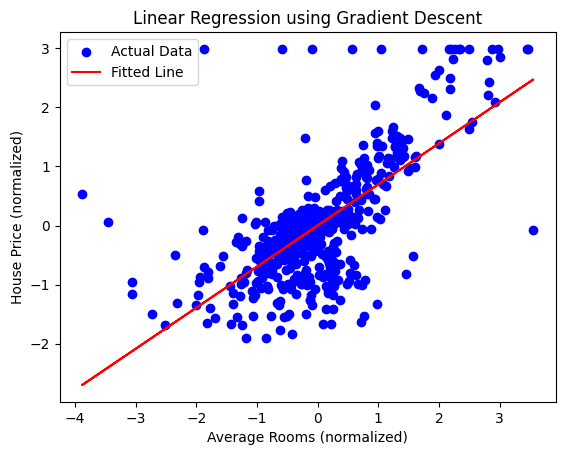

In [34]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load real dataset (Boston housing)
data = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Boston.csv')

# Select one feature (RM = average number of rooms per house)
x = data['RM'].values
y = data['MEDV'].values

# Normalize (important for gradient descent stability)
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

# Initialize parameters
m = 0      # slope
b = 0      # intercept
alpha = 0.01   # learning rate
epochs = 1000  # number of iterations
n = len(x)

# To store cost values for each iteration
cost_list = []

# Gradient Descent Loop
for i in range(epochs):
    # Predicted values
    y_pred = m * x + b

    # Calculate gradients (partial derivatives)
    dm = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    # Update parameters
    m = m - alpha * dm
    b = b - alpha * db

    # Compute cost (Mean Squared Error)
    cost = np.mean((y - y_pred) ** 2)
    cost_list.append(cost)

# Print final parameters and cost
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")
print(f"Final cost: {cost}")

# Plot cost reduction
plt.plot(range(epochs), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction over Iterations')
plt.show()

# Plot the fitted line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, m * x + b, color='red', label='Fitted Line')
plt.xlabel('Average Rooms (normalized)')
plt.ylabel('House Price (normalized)')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()


In [35]:
# Import library
from sklearn.datasets import make_regression
import pandas as pd

# Create a regression dataset with 1 feature and 4 samples
x, y = make_regression(n_samples=4, n_features=1, noise=80, random_state=13)

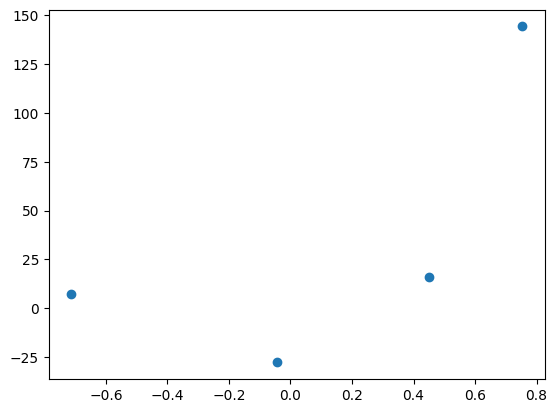

In [36]:
import matplotlib.pyplot as pll
plt.scatter(x,y)
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
model.coef_

array([78.35063668])

In [39]:
model.intercept_

np.float64(26.15963284313262)

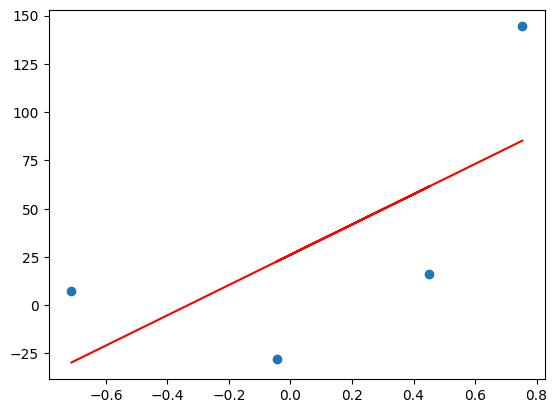

In [40]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "red")

In [41]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * x) + 100).reshape(4)

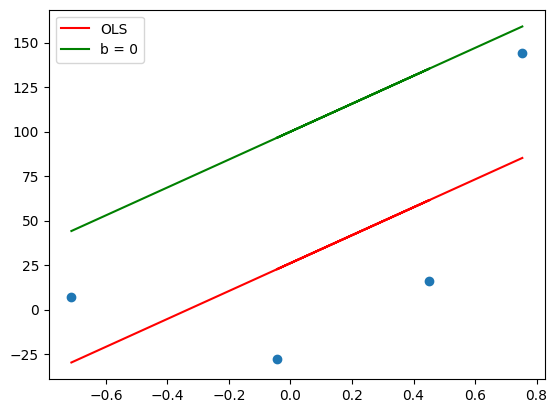

In [42]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "red",label="OLS")
plt.plot(x,y_pred, color="green",label = "b = 0")
plt.legend()
plt.show()

In [43]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

np.float64(590.7223659179078)

In [44]:

# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

np.float64(59.072236591790784)

In [45]:
# Calculating the new intercept
b = b - step_size
b

np.float64(40.927763408209216)

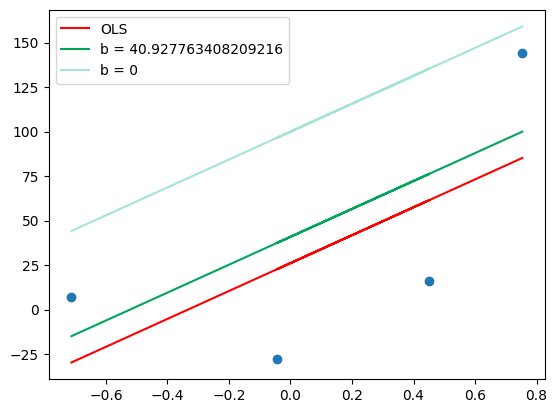

In [46]:

y_pred1 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,model.predict(x),color='red',label='OLS')
plt.plot(x,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

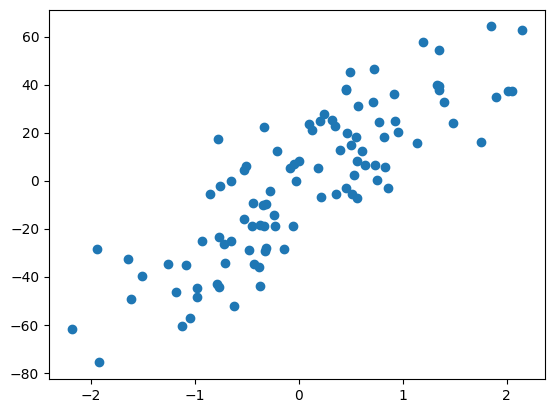

In [47]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [48]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train ,y_test = train_test_split(X,y,test_size= 0.2,random_state=2)

In [49]:
model.fit(x_train,y_train)
print(model.coef_)
print(model.intercept_)

[28.12597332]
-2.2710144261783825


In [58]:
from sklearn.metrics import r2_score
y_predtion = model.predict(x_test)
r2_score(y_test,y_predtion)

0.6345158782661012

In [91]:
class Gdregressor:
    def __init__(self,learning_rate,epoches):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epoches = epoches
    
    def fit(self,x,y):
        for i in range(self.epoches):
            loss_slope_m = -2 * np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
            loss_slope_b = -2 * np.sum(y - self.m*x.ravel() - self.b)
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m -(self.lr* loss_slope_m)
        print(self.m,self.b)
     
   

   
    

In [92]:
gd = Gdregressor(0.001,80)
gd.fit(x_train , y_train)

28.12627487585776 -2.2712395272648824
